# Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import sklearn

X_PATH = '/Users/jiujiu/Desktop/caam-495-fluid-flow/Data'
# modify as needed for personal computer

# Exploratory Data Analysis

### Importing Data and resizing 

In [8]:
X_unsized = pd.read_csv(X_PATH + '/x.csv', header = None)
X_unsized.head()
X_unsized.shape
X = np.resize(X_unsized.values, (120,300))
sample = X[0]
sample.resize(10,10,3)
X_new = []
for instance in X:
    temp = instance
    temp = np.reshape(temp,(10,10,3),order ='F')
    X_new.append(temp)
    
#     print(temp[:,:,0])
#     plt.matshow(temp[:,:,0])
#     plt.colorbar()
#     plt.show()
#     sds

print('Size of dataset X: ', len(X_new))
print('Where each instance is of size: ',temp.shape)

('Size of dataset X: ', 120)
('Where each instance is of size: ', (10, 10, 3))


### Visualizing Dataset

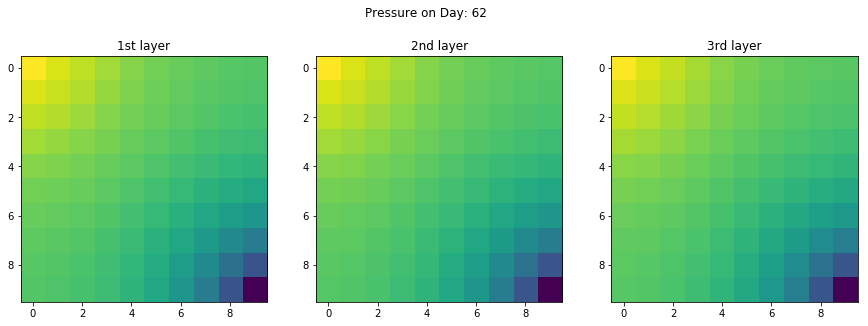

In [9]:
DAY = random.randint(0,119)
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5))

ax1.imshow(X_new[DAY][:,:,0])
ax1.set_title('1st layer')
ax2.imshow(X_new[DAY][:,:,1])
ax2.set_title('2nd layer')
ax3.imshow(X_new[DAY][:,:,2])
ax3.set_title('3rd layer')
fig.suptitle('Pressure on Day: ' + str(DAY))
plt.show()

# Constructing Raw Dataset

In [10]:
def create_dataset(X,window_len):
    """
    Takes in a timeseries X to create a dataset such that
    
    X_new = [[X_0,X_1,X_2,...,X_window_len],....[X_end-window_len,....,X_end]]
    Y_new = [X_window_len,....X_end]
    """
    X_new = []
    Y_new = X[window_len:]
    for index in range(len(X) - window_len):
        
        temp = np.reshape(X[index],(10,10,3,1))
        for i in range(1,window_len):
            new_X = np.reshape(X[index+i],(10,10,3,1))
            temp = np.concatenate((temp,new_X),axis = 3)
        
        X_new.append(temp)
    X_new = np.stack(X_new) 
    Y_new = np.stack(Y_new)
    return X_new,Y_new

### Sanity Check

In [11]:
X, Y = create_dataset(X_new,3)
print('Shape of each x:',X[0].shape)
print('Size of X dataset:',X.shape)
print('Structure        : (number of instances, x-space, y-space, z-space, time)')
print('Size of Y dataset:',Y.shape)

('Shape of each x:', (10, 10, 3, 3))
('Size of X dataset:', (117, 10, 10, 3, 3))
Structure        : (number of instances, x-space, y-space, z-space, time)
('Size of Y dataset:', (117, 10, 10, 3))


In [12]:
print('Sanity check so that we know that the first Y is the next X')
print(X[1][:,:,0,2] == Y[0][:,:,0])

Sanity check so that we know that the first Y is the next X
[[ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]


Ploting the pressure at the top level


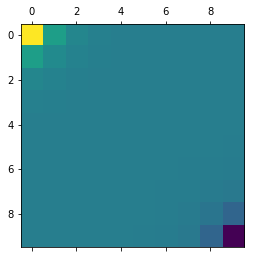

In [13]:
plt.matshow(X[0,:,:,0,0])
print('Ploting the pressure at the top level')
plt.show()

# Plotting

(120, 10, 10, 3)


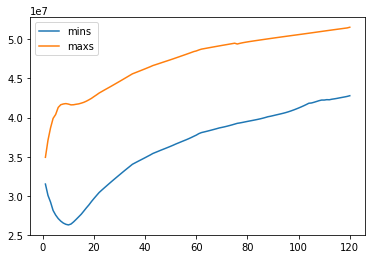

In [35]:
print np.shape(X_new)
mins = np.zeros([120,])
maxs = np.zeros([120,])
for day in range(120):
    mins[day] = np.min(X_new[day])
    maxs[day] = np.max(X_new[day])

line1 = plt.plot(range(1,121),mins,label='mins')
line2 = plt.plot(range(1,121),maxs,label='maxs')
plt.legend()

# Normalizing Dataset